#Scenario

You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

#Stakeholders

<ul>
    <li>Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer</li>
    <li>Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team</li>
</ul>

#Products

<ul>
    <li>Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.</li>
    <li>Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.</li>
    <li>Time: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.</li>
    <li>Spring: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.</li>
    <li>Bellabeat membership: Bellabeat also offers a subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.</li>
</ul>

#Ask

Sršen asks you to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices. She then wants you to select one Bellabeat product to apply these insights to in your presentation. These questions will guide your analysis:
<ol>
    <li>What are some trends in smart device usage?</li>
    <li>How could these trends apply to Bellabeat customers?</li>
    <li>How could these trends help influence Bellabeat marketing strategy?</li>
</ol>

#Deliverables

<ol>
    <li>A clear summary of the business tasks</li>
    <li>A description of all data sources used</li>
    <li>Documentation of any cleaning or manipulation of data</li>
    <li>A summary of your analysis</li>
    <li>Supporting visualizations and key findings</li>
    <li>Your top high-level content recommendations based on your analysis</li>
</ol>

---
#The Data

###Key Points
<ul>
    <li>Data is hosted on Kaggle by user Mobius, and contains no documentation, so proper scrutiny should be applied when considering the accuracy, validity, and bias of the dataset.</li>
    <li>18 unique CSVs are provided, with 6 of them being unable to be utilized, leaving us with a dataset of 12 CSVs for our analysis.</li>
    <li>The data was created from 33 unique participants in an Amazon Mechanical Turk survey. Due to the limited scope of the data, it and any conclusions drawn from it should be regarded as reference points rather than necessarily indicative of the market or user base as a whole.</li>
    <li>For the sake of the exercise, we will assume the data is complete, accurate, and unbiased.</li>
</ul>

The data is stored in Kaggle and is hosted and maintained by user Mobius. The data was originally collected by respondents to a distributed survey via Amazon Mechanical Turk between 3/12/2016 - 5/12/2016.

Mobius, who is self-reported as a data scientist in the healthcare industry in Melbourne, Australia, is active on Kaggle, competing in 50 competitions and hosting 53 datasets and 30+ code repositories. Due to their Kaggle activity, their familiarity with proper data governance and standards can be assumed. However, as the sole distributor and custodian of the data, appropriate scrutiny should be applied when determining data integrity.

The dataset contains 18 unique CSV documents at a complete size of 322.34MB:
dailyActivity_merged.csv, dailyCalories_merged.csv, dailyIntensities_merged.csv, dailySteps_merged.csv, hourlyCalories_merged.csv, hourlyIntensities_merged.csv, hourlySteps_merged.csv, minuteCaloriesWide_merged.csv, minuteIntensitiesWide_merged.csv, minuteSleep_merged.csv, sleepDay_merged.csv, weightLogInfo_merged.csv, heartrate_seconds_merged.csv, minuteCaloriesNarrow_merged.csv, minuteIntensitiesNarrow_merged.csv, minuteMETsNarrow_merged.csv, minuteStepsNarrow_merged.csv, minuteStepsWide_merged.csv.

Of the 18 unique CSV documents, the last 6 mentioned were unable to be opened in Excel and Google BigQuery due to their size and import errors. Due to this, they will not be used in this analysis.

An exploratory analysis of the provided data shows 33 unique user IDs for the dataset. Because of the relatively small sample size, valid insights may be obtained, but this dataset and any analyses and conclusions derived therefrom should be regarded as a reference point and not necessarily reflective of the market as a whole.

A lack of documentation on the data set is the primary issue at this juncture. Exploratory analysis may aid us in applying common-sense assumptions to the data, but without proper documentation from the data source, we are relying on conjecture.

Additionally, we do not have any informaton on the demographics of the participants in the study, so we do not know if there is any bias towards any demographic(s) in the data.

For the sake of this exercise, we will assume that Mobius has in good intention compiled, hosted, and distributed this data following established data governance and maintenance guidelines and that the data itself is accurate and unbiased.

&nbsp;
&nbsp;

---

&nbsp;
&nbsp;
#Data Cleaning

In [1]:
#install necessary Python libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#importing CSV and creating Pandas dataframe
data_activity_csv = "C:/Users/Jalen/Desktop/Case Study/Data/dailyActivity_merged.csv"
data_sleep_csv = "C:/Users/Jalen/Desktop/Case Study/Data/sleepDay_merged.csv"

df1 = pd.read_csv(data_activity_csv)
df2 = pd.read_csv(data_sleep_csv)

&nbsp;
&nbsp;

First let's merge the dataframes tracking daily activity and daily sleep.

In [3]:
#check column for df1
df1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
#check columns for df2
df2.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [5]:
#convert SleepDay column in df2 to match format in df1, rename

df2['SleepDay'] = pd.to_datetime(df2['SleepDay']) #make sure column is datetime

df2['SleepDay'] = pd.to_datetime(df2['SleepDay'].dt.strftime('%m/%d/%Y'))
df2.rename(columns={'SleepDay' : 'ActivityDate'}, inplace=True)
df2.head()

,Id,ActivityDate,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [6]:
#convert df1 ActivityDate to match ActivityDate of df2

df1['ActivityDate'] = pd.to_datetime(df1['ActivityDate']) #make sure column is datetime

df1['ActivityDate'] = pd.to_datetime(df1['ActivityDate'].dt.strftime('%m/%d/%Y'))
df1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [7]:
#merge dataframes

df  = pd.merge(left=df1, right=df2, on=['Id','ActivityDate'], how='outer')

In [8]:
#Take a quick look at the data to get familiar with the columns and information held within
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2.0,384.0,407.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2.0,340.0,367.0


&nbsp;
&nbsp;

Looking at the data, it looks like we have some NaN values in the sleep records. Because the records were matched on ID and ActivityDate, we can make the assumption that is the TotalSleepRecords column has an NaN value, the TotalMinutesAsleep an TotalTimeInBed columns will as well. We need to see how many rows are missing sleep information.

&nbsp;
&nbsp;

In [9]:
#Noticed we have some NaN values - count how many

print(df['TotalSleepRecords'].isna().sum(), ": number of NaN rows")
print(df.shape[0], ": number of rows total") #get number of rows 

530 : number of NaN rows
943 : number of rows total


&nbsp;
&nbsp;

530 rows with NaN for the sleep information is quite a bit given that we have 943 rows of information. That means ~56% of our rows do not contain information on the users sleep pattern. Given the large amount of rows missing sleep information, we don't want to attempt to fill the NaN values as that could lead to incorrect analysis down the line. Instead, we'll drop the rows where sleep information is missing and focus our attention only on rows that include activity + sleep information (information in both datasets).

&nbsp;
&nbsp;

In [10]:
#Create two new dataframes - one as it currently stands with sleep information missing, and one with rows dropped where sleep information is missing

df = df.dropna()

df.shape[0] #verify that new dataframe has expected 413 rows (number of total rows (943) - number of rows with missing sleep information (530))

413

In [11]:
#renaming Minutes columns to match Distance columns naming conventions. FairlyActiveMinutes -> ModeratelyActiveMinutes
#LightlyActiveMinutes -> LightActiveinutes

df.rename(columns={'FairlyActiveMinutes' : 'ModeratelyActiveMinutes', 'LightlyActiveMinutes' : 'LightActiveMinutes'}, inplace=True)
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,ModeratelyActiveMinutes,LightActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2.0,384.0,407.0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2.0,340.0,367.0
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1.0,700.0,712.0


In [12]:
#list columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 905
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        413 non-null    int64         
 1   ActivityDate              413 non-null    datetime64[ns]
 2   TotalSteps                413 non-null    int64         
 3   TotalDistance             413 non-null    float64       
 4   TrackerDistance           413 non-null    float64       
 5   LoggedActivitiesDistance  413 non-null    float64       
 6   VeryActiveDistance        413 non-null    float64       
 7   ModeratelyActiveDistance  413 non-null    float64       
 8   LightActiveDistance       413 non-null    float64       
 9   SedentaryActiveDistance   413 non-null    float64       
 10  VeryActiveMinutes         413 non-null    int64         
 11  ModeratelyActiveMinutes   413 non-null    int64         
 12  LightActiveMinutes    

In [13]:
#convert ID to string

df['Id'] = df['Id'].apply(str)
df.info() #verify

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 905
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        413 non-null    object        
 1   ActivityDate              413 non-null    datetime64[ns]
 2   TotalSteps                413 non-null    int64         
 3   TotalDistance             413 non-null    float64       
 4   TrackerDistance           413 non-null    float64       
 5   LoggedActivitiesDistance  413 non-null    float64       
 6   VeryActiveDistance        413 non-null    float64       
 7   ModeratelyActiveDistance  413 non-null    float64       
 8   LightActiveDistance       413 non-null    float64       
 9   SedentaryActiveDistance   413 non-null    float64       
 10  VeryActiveMinutes         413 non-null    int64         
 11  ModeratelyActiveMinutes   413 non-null    int64         
 12  LightActiveMinutes    

In [14]:
#No information on what TrackerDistance or LoggedActivitiesDistance are, so we will drop them and use TotalDistance instead

df.drop(['TrackerDistance', 'LoggedActivitiesDistance'], axis=1, inplace=True)

df.head() #verify

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,ModeratelyActiveMinutes,LightActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,1.88,0.55,6.06,0.0,25,13,328,728,1985,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,1.57,0.69,4.71,0.0,21,19,217,776,1797,2.0,384.0,407.0
3,1503960366,2016-04-15,9762,6.28,2.14,1.26,2.83,0.0,29,34,209,726,1745,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.16,2.71,0.41,5.04,0.0,36,10,221,773,1863,2.0,340.0,367.0
5,1503960366,2016-04-17,9705,6.48,3.19,0.78,2.51,0.0,38,20,164,539,1728,1.0,700.0,712.0


In [15]:
#Replace TotalDistance column with sum of VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance,
#SedentaryActiveDistance in case there's discrepancies in sums so that we can use true sum of the different types of activities

df['TotalDistance'] = df[["VeryActiveDistance", "ModeratelyActiveDistance", "LightActiveDistance", "SedentaryActiveDistance"]].sum(axis=1)

df.head() #verify

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,ModeratelyActiveMinutes,LightActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.49,1.88,0.55,6.06,0.0,25,13,328,728,1985,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,1.57,0.69,4.71,0.0,21,19,217,776,1797,2.0,384.0,407.0
3,1503960366,2016-04-15,9762,6.23,2.14,1.26,2.83,0.0,29,34,209,726,1745,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.16,2.71,0.41,5.04,0.0,36,10,221,773,1863,2.0,340.0,367.0
5,1503960366,2016-04-17,9705,6.48,3.19,0.78,2.51,0.0,38,20,164,539,1728,1.0,700.0,712.0


In [16]:
#create total active minutes. Not counting sedentary minutes as the assumption is they are minutes not spent being active

df['TotalActiveMinutes'] = df[['VeryActiveMinutes', 'ModeratelyActiveMinutes', 'LightActiveMinutes']].sum(axis=1)

#reorder columns
col = df['TotalActiveMinutes']
df.drop(labels=['TotalActiveMinutes'], axis=1, inplace = True)
df.insert(8, 'TotalActiveMinutes', col)

df.head() #verify

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,TotalActiveMinutes,VeryActiveMinutes,ModeratelyActiveMinutes,LightActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.49,1.88,0.55,6.06,0.0,366,25,13,328,728,1985,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,1.57,0.69,4.71,0.0,257,21,19,217,776,1797,2.0,384.0,407.0
3,1503960366,2016-04-15,9762,6.23,2.14,1.26,2.83,0.0,272,29,34,209,726,1745,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.16,2.71,0.41,5.04,0.0,267,36,10,221,773,1863,2.0,340.0,367.0
5,1503960366,2016-04-17,9705,6.48,3.19,0.78,2.51,0.0,222,38,20,164,539,1728,1.0,700.0,712.0


In [17]:
'''
Because we can't be sure what the TotalSteps column is based on, we are going to remove it and track distance instead as we have
already calculated it and are sure what the total is based on
'''

df.drop(['TotalSteps'], axis=1, inplace=True)

df.head() #verify

,Id,ActivityDate,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,TotalActiveMinutes,VeryActiveMinutes,ModeratelyActiveMinutes,LightActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,8.49,1.88,0.55,6.06,0.0,366,25,13,328,728,1985,1.0,327.0,346.0
1,1503960366,2016-04-13,6.97,1.57,0.69,4.71,0.0,257,21,19,217,776,1797,2.0,384.0,407.0
3,1503960366,2016-04-15,6.23,2.14,1.26,2.83,0.0,272,29,34,209,726,1745,1.0,412.0,442.0
4,1503960366,2016-04-16,8.16,2.71,0.41,5.04,0.0,267,36,10,221,773,1863,2.0,340.0,367.0
5,1503960366,2016-04-17,6.48,3.19,0.78,2.51,0.0,222,38,20,164,539,1728,1.0,700.0,712.0


In [18]:
#create new column that is the day of the week of the record, move to next to ActivityDate column, verify it worked

df['DayOfWeek'] = df['ActivityDate'].dt.day_name() #create column

#move DayOfWeek column to the right of ActivityDate column
col = df['DayOfWeek']
df.drop(labels=['DayOfWeek'], axis=1, inplace = True)
df.insert(2, 'DayOfWeek', col)

df.head() #verify

,Id,ActivityDate,DayOfWeek,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,TotalActiveMinutes,VeryActiveMinutes,ModeratelyActiveMinutes,LightActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,Tuesday,8.49,1.88,0.55,6.06,0.0,366,25,13,328,728,1985,1.0,327.0,346.0
1,1503960366,2016-04-13,Wednesday,6.97,1.57,0.69,4.71,0.0,257,21,19,217,776,1797,2.0,384.0,407.0
3,1503960366,2016-04-15,Friday,6.23,2.14,1.26,2.83,0.0,272,29,34,209,726,1745,1.0,412.0,442.0
4,1503960366,2016-04-16,Saturday,8.16,2.71,0.41,5.04,0.0,267,36,10,221,773,1863,2.0,340.0,367.0
5,1503960366,2016-04-17,Sunday,6.48,3.19,0.78,2.51,0.0,222,38,20,164,539,1728,1.0,700.0,712.0


In [19]:
#create column that is the percentage of time spent in bed actually sleeping
df['SleepBedQuotient'] = (df['TotalMinutesAsleep'] / df['TotalTimeInBed']) * 100

df.head(10)

,Id,ActivityDate,DayOfWeek,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,TotalActiveMinutes,VeryActiveMinutes,ModeratelyActiveMinutes,LightActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepBedQuotient
0,1503960366,2016-04-12,Tuesday,8.49,1.88,0.55,6.06,0.0,366,25,13,328,728,1985,1.0,327.0,346.0,94.508671
1,1503960366,2016-04-13,Wednesday,6.97,1.57,0.69,4.71,0.0,257,21,19,217,776,1797,2.0,384.0,407.0,94.348894
3,1503960366,2016-04-15,Friday,6.23,2.14,1.26,2.83,0.0,272,29,34,209,726,1745,1.0,412.0,442.0,93.212670
4,1503960366,2016-04-16,Saturday,8.16,2.71,0.41,5.04,0.0,267,36,10,221,773,1863,2.0,340.0,367.0,92.643052
5,1503960366,2016-04-17,Sunday,6.48,3.19,0.78,2.51,0.0,222,38,20,164,539,1728,1.0,700.0,712.0,98.314607
7,1503960366,2016-04-19,Tuesday,9.88,3.53,1.32,5.03,0.0,345,50,31,264,775,2035,1.0,304.0,320.0,95.000000
8,1503960366,2016-04-20,Wednesday,6.68,1.96,0.48,4.24,0.0,245,28,12,205,818,1786,1.0,360.0,377.0,95.490716
9,1503960366,2016-04-21,Thursday,6.34,1.34,0.35,4.65,0.0,238,19,8,211,838,1775,1.0,325.0,364.0,89.285714
11,1503960366,2016-04-23,Saturday,9.04,2.81,0.87,5.36,0.0,324,41,21,262,732,1949,1.0,361.0,384.0,94.010417
12,1503960366,2016-04-24,Sunday,6.41,2.92,0.21,3.28,0.0,282,39,5,238,709,1788,1.0,430.0,449.0,95.768374


---

#Data Exploration

In [20]:
#take a look at the describe function to see what it can tell us about the data

df.describe()

,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,TotalActiveMinutes,VeryActiveMinutes,ModeratelyActiveMinutes,LightActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepBedQuotient
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,6.008644,1.450363,0.750242,3.807119,0.000920,260.082324,25.188862,18.038741,216.854722,712.169492,2397.573850,1.118644,419.467312,458.639225,91.676921
std,3.027094,1.994352,1.000183,1.734511,0.008653,92.538672,36.388187,22.403590,87.164687,165.957432,762.886326,0.345521,118.344679,127.101607,8.703885
min,0.010000,0.000000,0.000000,0.010000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,257.000000,1.000000,58.000000,61.000000,49.836066
25%,3.600000,0.000000,0.000000,2.540000,0.000000,208.000000,0.000000,0.000000,158.000000,631.000000,1850.000000,1.000000,361.000000,403.000000,91.218130
50%,6.290000,0.570000,0.420000,3.680000,0.000000,264.000000,9.000000,11.000000,208.000000,717.000000,2220.000000,1.000000,433.000000,463.000000,94.312796
75%,8.030000,2.370000,1.040000,4.930000,0.000000,316.000000,38.000000,27.000000,263.000000,783.000000,2926.000000,1.000000,490.000000,526.000000,96.068796
max,17.550000,12.540000,6.480000,9.480000,0.110000,540.000000,210.000000,143.000000,518.000000,1265.000000,4900.000000,3.000000,796.000000,961.000000,100.000000


&nbsp;
&nbsp;

Let's take a look and see how many unique participants we have for our study. This will tell us our sample size.

&nbsp;
&nbsp;

In [21]:
#find unique IDs to get count of participants in study
df['Id'].nunique()

24

&nbsp;
&nbsp;

Our sample size is 24. [According to David Curry on BusinessOfApps](https://www.businessofapps.com/data/fitbit-statistics/), FitBit has an active userbase of 31 million people. For a population of 31 million, aiming for a confidence level and margin of error of 5%, ideally our sample size would be 385 participants or larger. Because of this, we have to be wary of claiming findings with certainty because the data we have from our population may not be representative of the FitBit userbase as a whole.

&nbsp;
&nbsp;

&nbsp;
&nbsp;

Now let's see if there are any interesting correlations in the data.

&nbsp;
&nbsp;

In [22]:
#Correlations

df.corr().style.background_gradient(cmap="Greens")

,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,TotalActiveMinutes,VeryActiveMinutes,ModeratelyActiveMinutes,LightActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepBedQuotient
TotalDistance,1.000000,0.711210,0.568687,0.599236,0.059953,0.729334,0.582270,0.554951,0.388586,-0.130251,0.511937,-0.142355,-0.172631,-0.158343,-0.077215
VeryActiveDistance,0.711210,1.000000,0.225194,-0.038710,0.052483,0.243989,0.850184,0.285730,-0.169330,0.006554,0.439557,-0.094848,-0.104905,-0.112891,0.021732
ModeratelyActiveDistance,0.568687,0.225194,1.000000,0.156589,0.064924,0.333292,0.183424,0.945402,0.034274,-0.042159,0.079078,-0.064137,-0.239093,-0.094983,-0.473712
LightActiveDistance,0.599236,-0.038710,0.156589,1.000000,0.001859,0.800020,-0.067224,0.094685,0.853070,-0.210728,0.342301,-0.102216,-0.042594,-0.091497,0.113189
SedentaryActiveDistance,0.059953,0.052483,0.064924,0.001859,1.000000,0.019213,0.018641,0.026984,0.005680,0.037328,0.027032,-0.036600,-0.038722,-0.054537,0.045371
TotalActiveMinutes,0.729334,0.243989,0.333292,0.800020,0.019213,1.000000,0.272037,0.355793,0.856639,-0.265341,0.394188,-0.135048,-0.063761,-0.093342,0.042630
VeryActiveMinutes,0.582270,0.850184,0.183424,-0.067224,0.018641,0.272037,1.000000,0.316221,-0.209933,-0.016930,0.610489,-0.119740,-0.090436,-0.112488,0.063559
ModeratelyActiveMinutes,0.554951,0.285730,0.945402,0.094685,0.026984,0.355793,0.316221,1.000000,-0.011308,-0.040660,0.179990,-0.078356,-0.244535,-0.111152,-0.441916
LightActiveMinutes,0.388586,-0.169330,0.034274,0.853070,0.005680,0.856639,-0.209933,-0.011308,1.000000,-0.264182,0.117371,-0.073248,0.032914,-0.023568,0.132308
SedentaryMinutes,-0.130251,0.006554,-0.042159,-0.210728,0.037328,-0.265341,-0.016930,-0.040660,-0.264182,1.000000,0.095315,-0.041876,-0.599394,-0.618713,0.019676


&nbsp;
&nbsp;

As far as correlations go, the ones that stick out as most interesting to me are calories burned. We don't have any correlation value above .7, indicating we don't have a strong correlation between calories burned and distance traveled or time spent in activity. The strongest correlation we do have is between calories burned and very active minutes, at .610. The next highest is between calories burned and total distance, at .512. This would seem to indicate that the greatest factor contributing to calories burned is how long you engage in very active exercise.

Additionally, we have negative correlations for Total Minutes Asleep and the different metrics tracking activity. The most significant correlation we get between minutes asleep and any measure tracking activity is for sedentary activity, at -.599. This would seem to suggest that the more you are sedentary, the less minutes of sleep you get per night.

&nbsp;
&nbsp;

&nbsp;
&nbsp;

Let's see which days of the week register the most recorded instances of activity. This should help us start to understand which days of the week users prefer to exercise.

&nbsp;
&nbsp;

In [23]:
#See which days have most registered activities
df_daily_activities = df['DayOfWeek'].value_counts().sort_values(ascending=True).to_frame()
df_daily_activities.reset_index(level=0, inplace=True)
df_daily_activities.rename(columns={'index' : 'DayOfWeek', 'DayOfWeek' : 'RegisteredActivities'}, inplace=True)

print(df_daily_activities)

   DayOfWeek  RegisteredActivities
0     Monday                    47
1     Sunday                    55
2     Friday                    57
3   Saturday                    58
4    Tuesday                    65
5   Thursday                    65
6  Wednesday                    66


&nbsp;
&nbsp;

As we can see, Wednesday has the most amount of registered activities, with Monday having the least. Interestingly, the 'Weekend' days of Friday, Saturday, and Sunday come in at the lower end of the scale for number of registered activities. People seem to be most active during the middle of the week (Tuesday, Wednesday, Thursday).

&nbsp;
&nbsp;

In [24]:
#preparing to graph in order of day of week

field = "DayOfWeek"
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [25]:
#create average dataframe

df_average_by_day=df.groupby(df.DayOfWeek, sort=False).mean().reset_index()

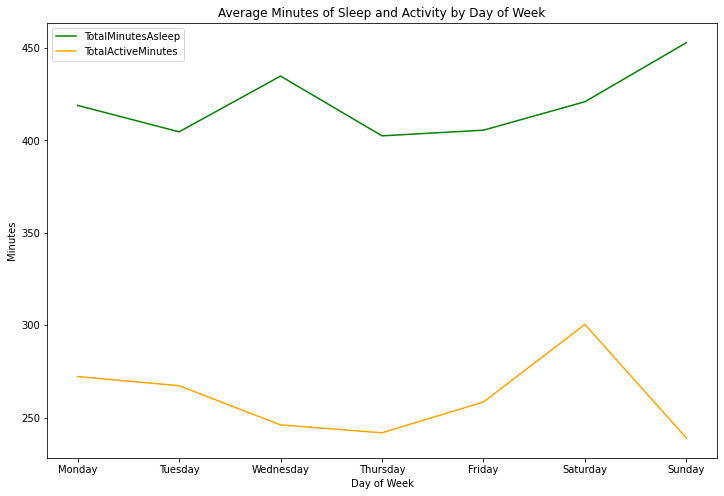

In [26]:
#Bar chart showing average minutes of sleep and activity by day of week

ax = df_average_by_day.set_index(field).loc[day_order, ['TotalMinutesAsleep', 'TotalActiveMinutes']].plot(kind='line', legend=True, color=['Green', 'Orange'], title='Average Minutes of Sleep and Activity by Day of Week', xlabel='Day of Week', ylabel='Minutes', figsize=(12,8))

&nbsp;
&nbsp;

Here we can see that physical activity in terms of average minutes peaks on Saturdays, with the lowest on Sundays. For average minutes of sleep, the highest is on Sundays and the lowest is on Thursdays.

&nbsp;
&nbsp;

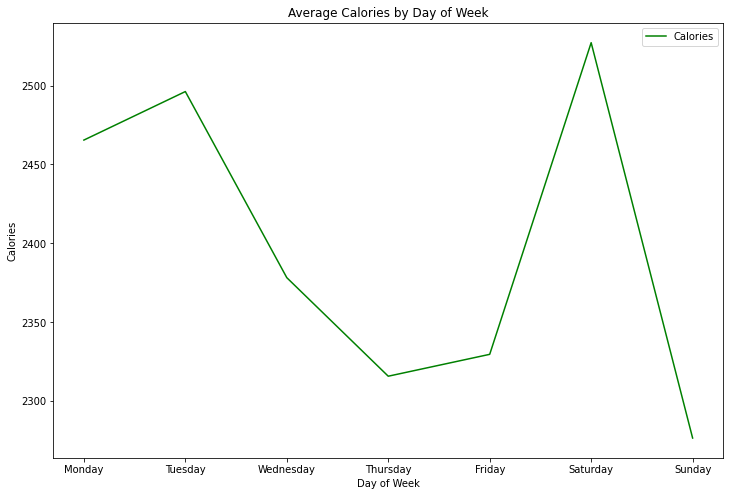

In [27]:
#Bar chart showing average calories by day of week

ax = df_average_by_day.set_index(field).loc[day_order, ['Calories']].plot(kind='line', legend=True, color=['Green'], title='Average Calories by Day of Week', xlabel='Day of Week', ylabel='Calories', figsize=(12,8))

&nbsp;
&nbsp;

Calories burned peaks on Saturdays and is at the lowest on Sundays.

&nbsp;
&nbsp;

&nbsp;
&nbsp;

The average percentage of time spent asleep while in bed is 91.68%.

&nbsp;
&nbsp;

In [28]:
#What is the average amount of time spent in physical activity per day in hours?

print(df['TotalActiveMinutes'].mean() / 60)
print(df['VeryActiveMinutes'].mean() / df['TotalActiveMinutes'].mean() * 100)
print(df['ModeratelyActiveMinutes'].mean() / df['TotalActiveMinutes'].mean() * 100)
print(df['LightActiveMinutes'].mean() / df['TotalActiveMinutes'].mean() * 100)

4.334705407586764
9.684957268140092
6.935781183086004
83.3792615487739


&nbsp;
&nbsp;

The average amount of time spent in any type of physical activity (light, moderate, active) per day is 4.3 hours. However, 83.34% of that time is spent in light activity, 6.94% in moderate activity, and 9.68% in very active activity. This would suggest that the vast majority of exercise the respodents are getting is in light exercise.

&nbsp;
&nbsp;

In [29]:
#What is the average percentage of time spent in bed time asleep?
#What is the average amount of time spent sleeping per day in hours?

print(df['SleepBedQuotient'].mean())
print(df['TotalMinutesAsleep'].mean() / 60)

91.67692065151059
6.991121872477804


&nbsp;
&nbsp;

The average percentage of time spent asleep while in bed is 91.68%, while the average amount of time spent sleeping per day is 7 hours. According to the [CDC](https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html), the average adult should get 7 or more hours of sleep per night, so the average user in this dataset meets the CDC recommendation.

&nbsp;
&nbsp;

---

#Key Findings

Due to the limitations we have with this data described throughout the document, we have to be careful of ascribing hard-and-fast rules to what we've found. However, for the sake of the exercise, I think we can make a few key findings:

<ol>
    <li>To burn the most calories, spend more time engaging in vigorous exercise activities</li>
    <li>The middle of the week (Tuesday, Wednesday, Thursday) has the highest recorded amounts of physical activities, while the weekends (Friday, Saturday, Sunday) have the lowest</li>
    <li>Users recorded sleeping the most on Sundays and Wednesdays, and the least on Tuesdays and Thursdays.</li>
    <li>The average amount of time spent sleeping per day is 7 hours.</li>
    <li>The vast majority (83.34%) of the amount of physical activity done is in light activity.</li>
</ol>

&nbsp;
&nbsp;

---

#Recommendations

For the BellaBeat Membership:

<ol>
    <li>Because users exercise the least on the weekends, a system of guided exercies and reminder notifications on the weekends could serve to boost the number of people exercising during those typically low-exercise days.</li>
    <li>Increasing the amount of guided exercises that utilize very active physical activity will help users burn more calories.</li>
    <li>Sending reminders to users on Tuesdays and Thursdays, the days with the least sleep, to go to bed earlier than their normal tracked time can help to increase the amount of sleep users get on those days.</li>
</ol>